# Background

In the current digital era, social media platforms have emerged as a popular forum for people to share their thoughts and experiences, including their dealings United airlines. Twitter, one of the most popular channels for in-the-moment updates and communication, is a priceless resource for opinions and sentiments on airline services. Text sentiment analysis of tweets about airlines can yield valuable information and benefits for both United Airlines' business and passengers.

1. Customer Insights: Sentiment analysis enables United Airlines to obtain a deeper understanding of their customers' attitudes and feelings. United airlines can determine their strengths and areas for improvement by classifying tweets as good, negative, or neutral. For data-driven decision-making and improving their overall customer experience, understanding customer sentiment is essential.

3. Reputation Management: United Airlines is aware of the importance of maintaining a positive internet reputation. An airline's reputation can suffer and potential customers may be turned off by negative comments on social media. Sentiment analysis offers a proactive method for handling problems swiftly, reducing bad press, and successfully managing brand impression.

9. Enhancing Customer Satisfaction: United Airlines can raise overall customer satisfaction by proactively addressing problems discovered through sentiment research. Customers who are satisfied are more inclined to stick with a brand and recommend it to others.

In conclusion, United Airlines' business can benefit greatly from sentiment analysis of tweets mentioning airlines. It offers practical insights that help improve client satisfaction, brand reputation, and competitiveness in a market that is continually changing. Airlines can keep aware of client sentiment, adjust to shifting tastes, and make data-driven decisions that are advantageous to both customers and the airline itself by utilizing sentiment analysis.

# EDA and Data Cleaning of Tweets Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

tweet_data = pd.read_csv("/content/drive/MyDrive/Tweets.csv")

tweet_data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df = tweet_data[['airline_sentiment', 'text']]
print("Number of records:",df.shape[0])
df.head()

Number of records: 14640


,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [ ]:
print("Percentage of duplicates:",round((df.duplicated().sum()/df.shape[0]),2)*100,"%")

Percentage of duplicates: 1.0 %


In [ ]:
# drop duplicates
df = df.drop_duplicates()

In [ ]:
# no null values
df.isna().sum()

airline_sentiment    0
text                 0
dtype: int64

Total records: 14452


airline_sentiment,occurrences,occurrences (%)
negative,9087,62.88%
neutral,3067,21.22%
positive,2298,15.9%


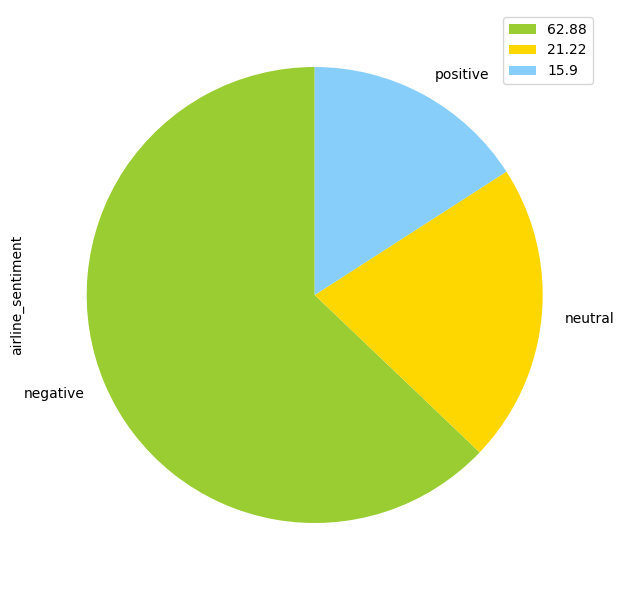

In [ ]:
import matplotlib.pyplot as plt

dataframe = df
column = 'airline_sentiment'
# Checking the distribution of the stars
stars = pd.DataFrame({'occurrences': dataframe[column].value_counts(),
                      'occurrences (%)': [str(round((x/len(dataframe)*100), 2))+"%" for x in dataframe[column].value_counts()]}).rename_axis(columns="airline_sentiment")
print("Total records:", sum(stars['occurrences']))
display(stars)

labels = round((dataframe[column].value_counts()/len(dataframe)*100),2)
sizes = round((dataframe[column].value_counts()/len(dataframe)*100),2)
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'pink']
(dataframe[column].value_counts()/len(dataframe)*100).plot(kind='pie', figsize=(14,6), colors=colors, startangle=90)
plt.legend(labels, loc="best")
plt.tight_layout()
plt.show()

Majority of the text are of negative sentiment. In order to prevent the model from being biased toward the negative sentiment, I will perform random undersampling on the negative class to 3000 records.

In [ ]:
positive_sentiment = df[df['airline_sentiment'] == 'positive']
neutral_sentiment = df[df['airline_sentiment'] == 'neutral']
negative_sentiment = df[df['airline_sentiment'] == 'negative']

# Resampling
from sklearn.utils import resample
negative_sentiment_undersampled = resample(negative_sentiment, replace=False, n_samples=3000, random_state=42)

# Storing back in a dataframe
balanced_df = pd.concat([positive_sentiment, negative_sentiment_undersampled, neutral_sentiment])

Total records: 8365


airline_sentiment,occurrences,occurrences (%)
neutral,3067,36.66%
negative,3000,35.86%
positive,2298,27.47%


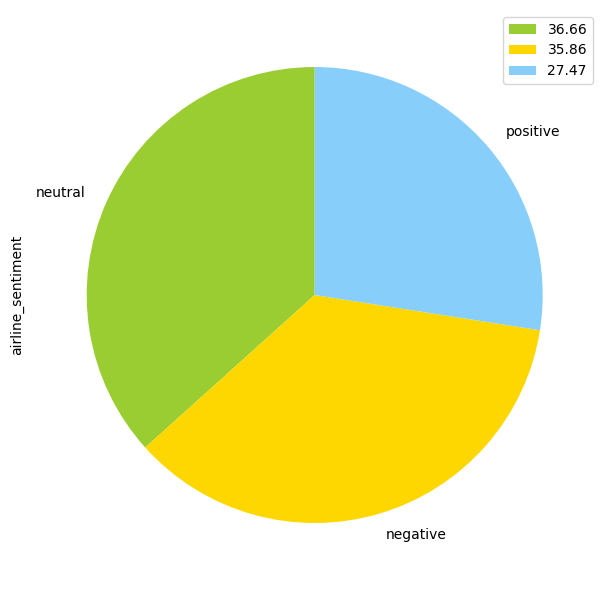

In [ ]:
import matplotlib.pyplot as plt

dataframe = balanced_df
column = 'airline_sentiment'

# Checking the distribution of the stars
stars = pd.DataFrame({'occurrences': dataframe[column].value_counts(),
                      'occurrences (%)': [str(round((x/len(dataframe)*100), 2))+"%" for x in dataframe[column].value_counts()]}).rename_axis(columns="airline_sentiment")
print("Total records:", sum(stars['occurrences']))
display(stars)

labels = round((dataframe[column].value_counts()/len(dataframe)*100),2)
sizes = round((dataframe[column].value_counts()/len(dataframe)*100),2)
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'pink']
(dataframe[column].value_counts()/len(dataframe)*100).plot(kind='pie', figsize=(14,6), colors=colors, startangle=90)
plt.legend(labels, loc="best")
plt.tight_layout()
plt.show()

In [ ]:
balanced_df.head()

,airline_sentiment,text
1,positive,@VirginAmerica plus you've added commercials t...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."
8,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,positive,"@VirginAmerica it was amazing, and arrived an ..."
11,positive,@VirginAmerica I &lt;3 pretty graphics. so muc...


Now, the dataset looks more balanced. Let's just reset the index.

In [ ]:
balanced_df = balanced_df.reset_index(drop=True)
balanced_df.head()

,airline_sentiment,text
0,positive,@VirginAmerica plus you've added commercials t...
1,positive,"@VirginAmerica yes, nearly every time I fly VX..."
2,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D"
3,positive,"@VirginAmerica it was amazing, and arrived an ..."
4,positive,@VirginAmerica I &lt;3 pretty graphics. so muc...


In [ ]:
texts = [text.lower() for text in df['text']]

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize

tokenized_words = [word_tokenize(text) for text in texts]

In [ ]:
# Get the tokenized words
tokenized_word_list = [word for word_lists in tokenized_words for word in word_lists]

# Get the word lengths
word_lengths = [len(word) for word in tokenized_word_list]

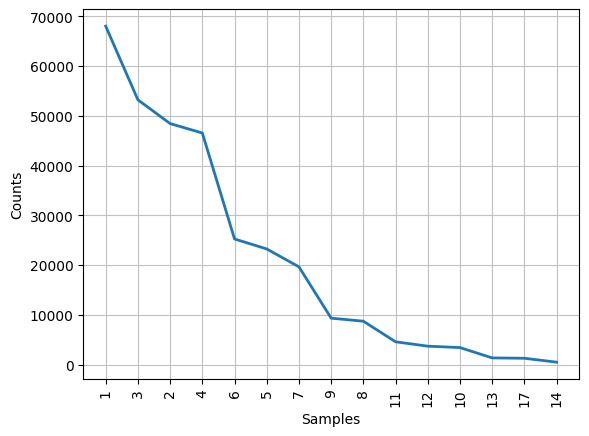

In [ ]:
# Generate frequency for all the words
freq_dist = nltk.FreqDist(word_lengths)

# Visualizing
word_length_frequency_dict = dict([(k,v) for k,v in freq_dist.items()])

# create frequency distribution of the filtered words
freq_dist = nltk.FreqDist(word_length_frequency_dict)

# plot the frequency distribution of the top 50 words
freq_dist.plot(15, cumulative=False)
plt.show()

In [ ]:
# At word lengths of more than 10, the curve starts to flat line.
# Therefore, look at the words with length above 10.

odd_lengths = [words for words in tokenized_word_list if len(words)>10]
print(odd_lengths[:10])

['virginamerica', 'virginamerica', 'commercials', 'virginamerica', 'virginamerica', 'entertainment', 'virginamerica', 'virginamerica', 'virginamerica', 'virginamerica']


In [ ]:
# At word lengths of more than 10, the curve starts to flat line.
# Therefore, look at the words with length above 10.

va_occurrence = [words for words in tokenized_word_list if words=='virginamerica']
print(len(va_occurrence))

522


Looks like 'virginamerica' is mentioned alot. Since it's a tweet, the user has to mention '@virginamerica' too. Therefore, they should be removed.

In [ ]:
# Checking for words with '.' in odd length words
# This could help us identify website links within the words with long lengths
dots_in_text = [word for word in odd_lengths if '.' in word]
print(dots_in_text[:10])
print(len(dots_in_text))

['//t.co/mwpg7grezp', '//t.co/ahlxhhkiyn', '//t.co/ut5grrwaaa', '//t.co/r8p2zy3fe4', '//t.co/y7o0unxtqp', '//t.co/vhp2gtdwpk', '//t.co/dw5nf0ibtr', '//t.co/oa2drfaoq2', '//t.co/lwwdac2khx', '//t.co/f2lfulcbq7']
1320


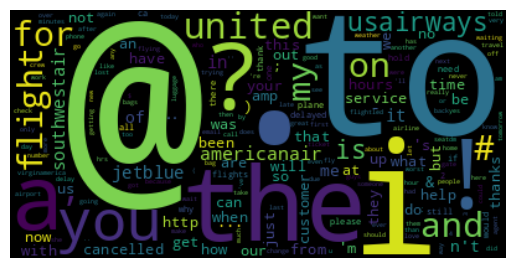

In [ ]:
# Generate frequency for all the words
freq_dist = nltk.FreqDist(tokenized_word_list)

# Visualizing
words = dict([(k,v) for k,v in freq_dist.items()])

# create frequency distribution of the filtered words
freq_dist = nltk.FreqDist(words)

# build wordcloud
from wordcloud import WordCloud
wcloud = WordCloud().generate_from_frequencies(freq_dist)

# plot the wordcloud
import matplotlib.pyplot as plt
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

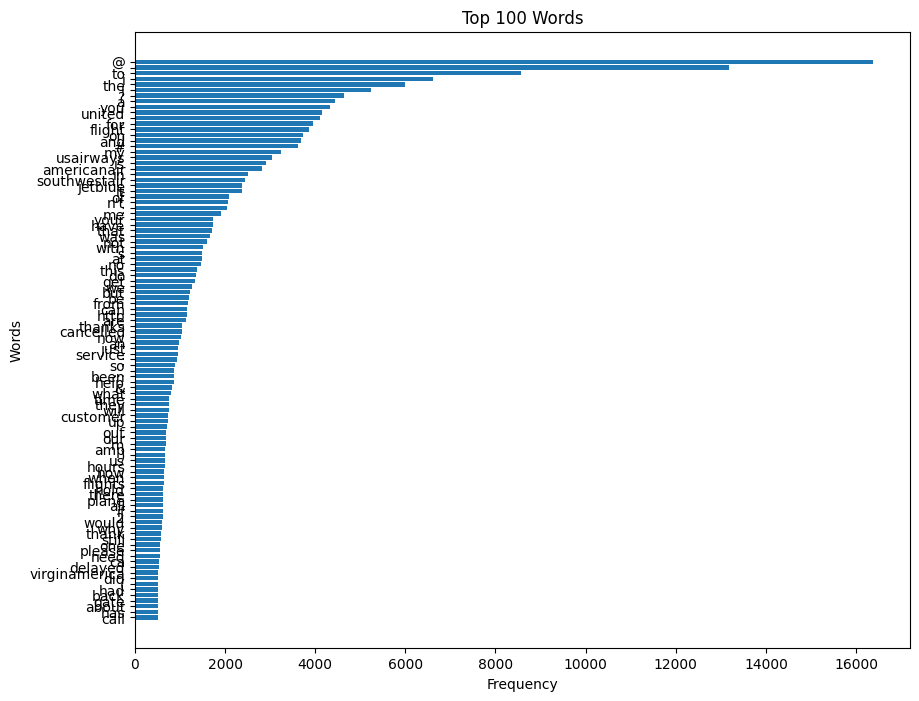

['@', '.', 'to', 'i', 'the', '!', '?', 'a', 'you', 'united', ',', 'for', 'flight', 'on', 'and', '#', 'my', 'usairways', 'is', 'americanair', 'in', 'southwestair', 'jetblue', 'it', 'of', "n't", ':', 'me', 'your', 'have', 'that', 'was', 'not', 'with', "'s", 'at', 'no', 'this', 'do', 'get', 'we', 'but', 'be', 'from', 'can', 'http', 'are', 'thanks', 'cancelled', 'now', 'an', 'just', 'service', ';', 'so', '...', 'been', 'help', '&', 'what', 'time', 'they', 'will', 'customer', 'up', '-', 'out', 'our', "'m", 'amp', ')', 'us', 'hours', 'how', 'when', 'flights', 'hold', 'there', 'plane', 'all', 'if', '2', 'would', 'why', 'thank', 'still', 'one', 'please', 'need', 'ca', 'delayed', 'virginamerica', 'did', '(', 'had', 'back', 'gate', 'about', 'has', 'call']


In [ ]:
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
freq_dist = nltk.FreqDist(tokenized_word_list)
# Get the top 100 words and their frequencies
top_words = freq_dist.most_common(100)

# Separate the words and frequencies for plotting and storing
words, frequencies = zip(*top_words)
top_words_list = [word for word, freq in top_words]

# Plotting the top 100 words
plt.figure(figsize=(10, 8))
plt.barh(range(len(words)), frequencies, align='center')
plt.yticks(range(len(words)), words)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 100 Words')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top
plt.show()

# Store the top 50 words in a list
top_100_words = list(top_words_list)
print(top_100_words)

Majority of the top words are short words and punctuations.

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Removing pattern specific words.

# This patterns remove all links that start with \\/
link_pattern = 'https?://t\.co/[\w\d]+|//t\.co/[\w\d]+'

# This pattern removes all links that end with some common domain names
va_pattern = '@\w+|@?virginamerica'

# Define a function to remove patterns, criteria, and top 100 words from a text
def remove_patterns_criteria_and_top_words(text, top_words_list):
    # Remove links and mentions
    text = re.sub(link_pattern, '', text)
    text = re.sub(va_pattern, '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Define a set of stopwords
    stop_words = set(stopwords.words('english'))

    lemmatizer = WordNetLemmatizer()

    # Filter tokens based on criteria and exclude top 50 words
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if
                       word not in top_words_list and
                       not word.isnumeric() and
                       word not in stop_words and
                       word.isalpha() and len(word) > 2]

    # Reconstruct the filtered text
    filtered_text = ' '.join(filtered_tokens)

    return filtered_text

# Apply the modified function to the 'text' column
balanced_df['text'] = balanced_df['text'].apply(lambda x: remove_patterns_criteria_and_top_words(x, top_100_words))


In [ ]:
balanced_df.head()

,airline_sentiment,text
0,positive,plus added commercial experience tacky
1,positive,yes nearly every fly ear worm away
2,positive,Well NOW
3,positive,amazing arrived hour early You good
4,positive,pretty graphic much better minimal iconography


In [ ]:
average_text_length = balanced_df['text'].apply(len).mean()
print("Average Text Length:", average_text_length)

Average Text Length: 45.08643156007173


In [ ]:
unique_word_count = len(set(" ".join(balanced_df['text']).split()))
print("Number of Unique Words:", unique_word_count)

Number of Unique Words: 9191


In [ ]:
balanced_df.loc[lambda balanced_df: balanced_df['airline_sentiment'] == 'negative', 'airline_sentiment'] = 0
balanced_df.loc[lambda balanced_df: balanced_df['airline_sentiment'] == 'neutral', 'airline_sentiment'] = 1
balanced_df.loc[lambda balanced_df: balanced_df['airline_sentiment'] == 'positive', 'airline_sentiment'] = 2

In [ ]:
balanced_df.head()

,airline_sentiment,text
0,2,plus added commercial experience tacky
1,2,yes nearly every fly ear worm away
2,2,Well NOW
3,2,amazing arrived hour early You good
4,2,pretty graphic much better minimal iconography


In [ ]:
balanced_df.airline_sentiment.value_counts()

1    3067
0    3000
2    2298
Name: airline_sentiment, dtype: int64

Store the data for modelling

In [ ]:
import os
from sklearn.model_selection import train_test_split

# Split the data into train and test while maintaining class distribution
train_df, test_df = train_test_split(balanced_df, test_size=0.2, stratify=balanced_df['airline_sentiment'], random_state=42)

main_folder = '/tweet_processed'
train_folder = os.path.join(main_folder, 'train')
test_folder = os.path.join(main_folder, 'test')

# Create train and test directories
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Define the sentiments
sentiments = {0: 'neg', 1: 'neutral', 2: 'pos'}

# Iterate through sentiments
for sentiment_label, sentiment_name in sentiments.items():
    # Create subdirectories for each sentiment in train and test
    os.makedirs(os.path.join(train_folder, sentiment_name), exist_ok=True)
    os.makedirs(os.path.join(test_folder, sentiment_name), exist_ok=True)

    # Filter the DataFrame based on the sentiment label
    train_sentiment_df = train_df[train_df['airline_sentiment'] == sentiment_label]
    test_sentiment_df = test_df[test_df['airline_sentiment'] == sentiment_label]

    # Write the text data to the corresponding sentiment folders for training
    for i, row in enumerate(train_sentiment_df.itertuples()):
        text = row.text
        file_path = os.path.join(train_folder, sentiment_name, f'{sentiment_label}_{i + 1}.txt')
        with open(file_path, 'w', encoding='utf-8') as file:
            file.write(text)

    # Write the text data to the corresponding sentiment folders for testing
    for i, row in enumerate(test_sentiment_df.itertuples()):
        text = row.text
        file_path = os.path.join(test_folder, sentiment_name, f'{sentiment_label}_{i + 1}.txt')
        with open(file_path, 'w', encoding='utf-8') as file:
            file.write(text)


# EDA and Data cleaning of Flipkart Dataset

In [ ]:
import pandas as pd
amazon = pd.read_csv("/content/drive/MyDrive/Reviews.csv", encoding='utf-8')

amazon.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
amazon = amazon[['Score', 'Text']]

In [ ]:
def map_score_to_sentiment(score):
    if score == 1:
        return "negative"
    elif score == 3:
        return "neutral"
    elif score == 5:
        return "positive"
    else:
        return None  # Return None for scores other than 0, 3, and 5

# Apply the mapping function to the 'Score' column and create a new 'Sentiment' column
amazon['Sentiment'] = amazon['Score'].apply(map_score_to_sentiment)

# Drop rows with 'Sentiment' as None (scores other than 0, 3, and 5)
amazon = amazon.dropna(subset=['Sentiment'])

# Drop the original 'Score' column and keep only 'Text' and 'Sentiment'
amazon = amazon[['Text', 'Sentiment']]

In [ ]:
amazon.head()

,Text,Sentiment
0,I have bought several of the Vitality canned d...,positive
1,Product arrived labeled as Jumbo Salted Peanut...,negative
4,Great taffy at a great price. There was a wid...,positive
6,This saltwater taffy had great flavors and was...,positive
7,This taffy is so good. It is very soft and ch...,positive


In [ ]:
amazon = amazon.reset_index(drop=True)

In [ ]:
print("Number of records:",amazon.shape[0])

Number of records: 458030


In [ ]:
amazon = amazon.drop_duplicates()
print("Number of records:",amazon.shape[0])

Number of records: 316797


Total records: 316797


airline_sentiment,occurrences,occurrences (%)
positive,250745,79.15%
negative,36280,11.45%
neutral,29772,9.4%


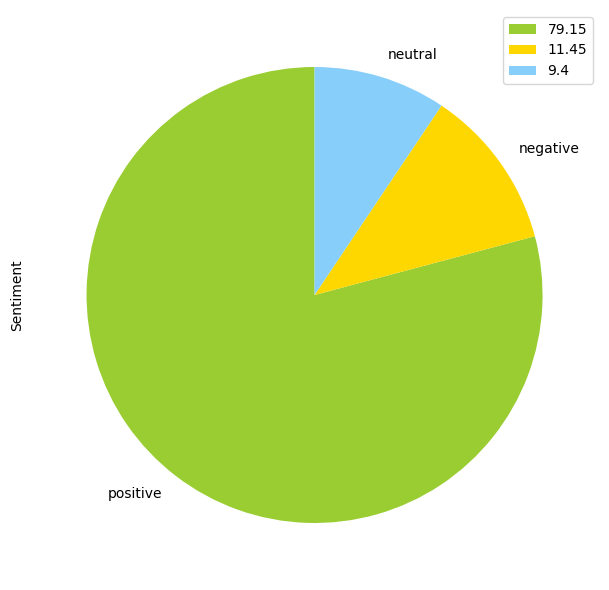

In [ ]:
import matplotlib.pyplot as plt

dataframe = amazon
column = 'Sentiment'
# Checking the distribution of the stars
stars = pd.DataFrame({'occurrences': dataframe[column].value_counts(),
                      'occurrences (%)': [str(round((x/len(dataframe)*100), 2))+"%" for x in dataframe[column].value_counts()]}).rename_axis(columns="airline_sentiment")
print("Total records:", sum(stars['occurrences']))
display(stars)

labels = round((dataframe[column].value_counts()/len(dataframe)*100),2)
sizes = round((dataframe[column].value_counts()/len(dataframe)*100),2)
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'pink']
(dataframe[column].value_counts()/len(dataframe)*100).plot(kind='pie', figsize=(14,6), colors=colors, startangle=90)
plt.legend(labels, loc="best")
plt.tight_layout()
plt.show()

In [ ]:
positive_sentiment = amazon[amazon['Sentiment'] == 'positive']
neutral_sentiment = amazon[amazon['Sentiment'] == 'neutral']
negative_sentiment = amazon[amazon['Sentiment'] == 'negative']

# Resampling
from sklearn.utils import resample
positive_sentiment_undersampled = resample(positive_sentiment, replace=False, n_samples=3000, random_state=42)
neutral_sentiment_undersampled = resample(neutral_sentiment, replace=False, n_samples=3000, random_state=42)
negative_sentiment_undersampled = resample(negative_sentiment, replace=False, n_samples=3000, random_state=42)

# Storing back in a dataframe
balanced_df = pd.concat([positive_sentiment_undersampled, neutral_sentiment_undersampled, negative_sentiment_undersampled])

In [ ]:
balanced_df.head()

,Text,Sentiment
330374,These chocolate liqueurs are delicious. I boug...,positive
417081,I am so excited to see that Amazon carries Ble...,positive
336084,As a mom of a child with multiple food allergi...,positive
320563,This is the CLOSEST thing to wheat bread that ...,positive
301615,This soup is the closest to homemade that I ha...,positive


Total records: 9000


airline_sentiment,occurrences,occurrences (%)
positive,3000,33.33%
neutral,3000,33.33%
negative,3000,33.33%


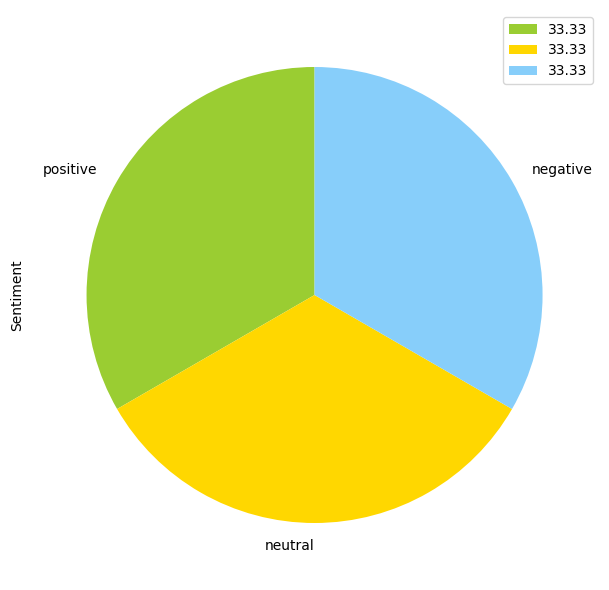

In [ ]:
import matplotlib.pyplot as plt

dataframe = balanced_df
column = 'Sentiment'
# Checking the distribution of the stars
stars = pd.DataFrame({'occurrences': dataframe[column].value_counts(),
                      'occurrences (%)': [str(round((x/len(dataframe)*100), 2))+"%" for x in dataframe[column].value_counts()]}).rename_axis(columns="airline_sentiment")
print("Total records:", sum(stars['occurrences']))
display(stars)

labels = round((dataframe[column].value_counts()/len(dataframe)*100),2)
sizes = round((dataframe[column].value_counts()/len(dataframe)*100),2)
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'pink']
(dataframe[column].value_counts()/len(dataframe)*100).plot(kind='pie', figsize=(14,6), colors=colors, startangle=90)
plt.legend(labels, loc="best")
plt.tight_layout()
plt.show()

In [ ]:
texts = [text.lower() for text in balanced_df['Text']]

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize

tokenized_words = [word_tokenize(text) for text in texts]

In [ ]:
# Get the tokenized words
tokenized_word_list = [word for word_lists in tokenized_words for word in word_lists]

# Get the word lengths
word_lengths = [len(word) for word in tokenized_word_list]

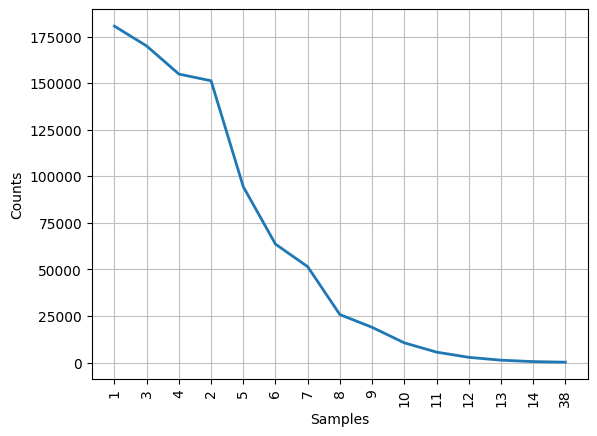

In [ ]:
# Generate frequency for all the words
freq_dist = nltk.FreqDist(word_lengths)

# Visualizing
word_length_frequency_dict = dict([(k,v) for k,v in freq_dist.items()])

# create frequency distribution of the filtered words
freq_dist = nltk.FreqDist(word_length_frequency_dict)

# plot the frequency distribution of the top 50 words
freq_dist.plot(15, cumulative=False)
plt.show()

In [ ]:
# At word lengths of more than 10, the curve starts to flat line.
# Therefore, look at the words with length above 10.

odd_lengths = [words for words in tokenized_word_list if len(words)>15]
print(odd_lengths[:10])

['chain-pet-stores-that-shall-remain-nameless.', 'nervous/neurotic', 'relish/flavoring', '//www.amazon.com/gp/product/b000hdjya2', 'not-gourmet-speak', '//www.amazon.com/gp/product/b000fakup0', '//www.amazon.com/gp/product/b001eq4y4w', '//www.amazon.com/gp/product/b000nertse', 'salt-and-vinegar', 'non-hydrogenated']


In [ ]:
# Checking for words with '.' in odd length words
# This could help us identify website links within the words with long lengths
dots_in_text = [word for word in odd_lengths if '.' in word]
print(dots_in_text[:10])
print(len(dots_in_text))

['chain-pet-stores-that-shall-remain-nameless.', '//www.amazon.com/gp/product/b000hdjya2', '//www.amazon.com/gp/product/b000fakup0', '//www.amazon.com/gp/product/b001eq4y4w', '//www.amazon.com/gp/product/b000nertse', '//www.amazon.com/gp/product/b001kjspqq', '//www.amazon.com/gp/product/b007r900wa', 'product.wonderfull', '//www.amazon.com/gp/product/b000ayfao2', '//www.amazon.com/gp/product/b000bezvw2']
275


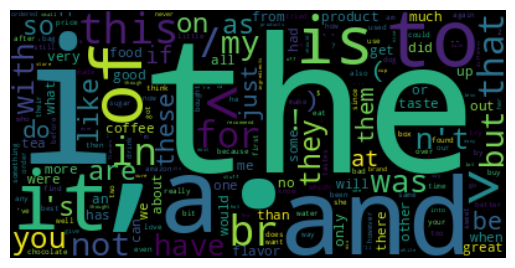

In [ ]:
# Generate frequency for all the words
freq_dist = nltk.FreqDist(tokenized_word_list)

# Visualizing
words = dict([(k,v) for k,v in freq_dist.items()])

# create frequency distribution of the filtered words
freq_dist = nltk.FreqDist(words)

# build wordcloud
from wordcloud import WordCloud
wcloud = WordCloud().generate_from_frequencies(freq_dist)

# plot the wordcloud
import matplotlib.pyplot as plt
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Majority of the top words are short words and punctuations.

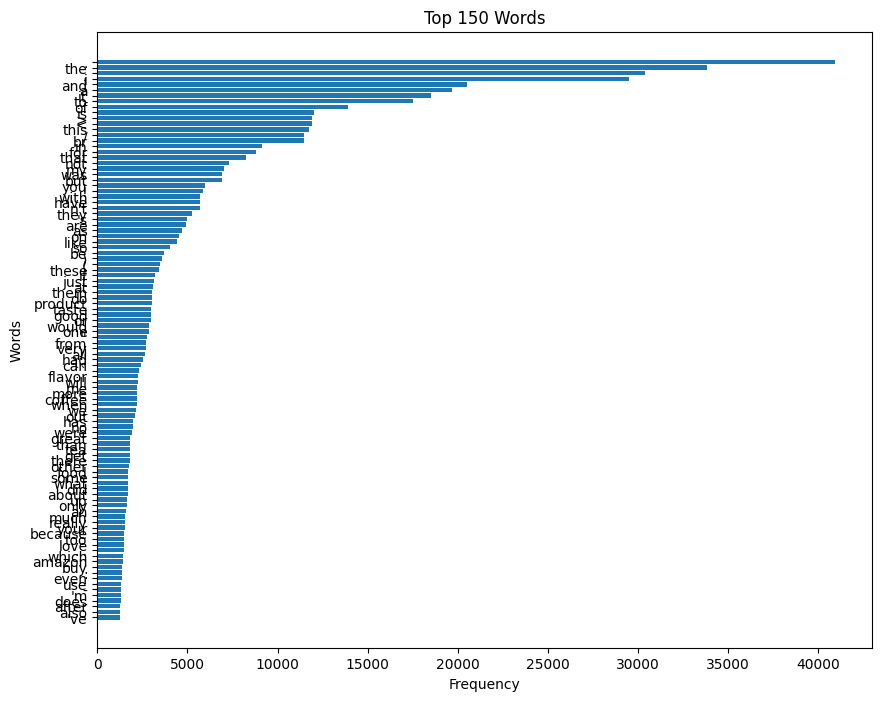

['.', 'the', ',', 'i', 'and', 'a', 'it', 'to', 'of', 'is', '>', '<', 'this', '/', 'br', 'in', 'for', 'that', 'not', 'my', 'was', 'but', 'you', '!', 'with', 'have', "n't", 'they', "'s", 'are', 'as', 'on', 'like', 'so', 'be', ')', '(', 'these', 'if', 'just', 'at', 'them', 'do', 'product', 'taste', 'good', 'or', 'would', 'one', "''", 'from', 'very', 'all', 'had', 'can', '``', 'flavor', 'will', 'me', 'more', 'coffee', 'when', 'we', 'out', 'has', 'no', 'were', 'great', 'than', 'tea', 'get', 'there', 'other', 'food', 'some', 'what', 'did', 'about', 'up', 'only', 'an', 'much', 'really', 'your', 'because', 'too', 'love', '...', 'which', 'amazon', 'buy', ':', 'even', 'use', '-', "'m", 'does', 'after', 'also', "'ve"]


In [ ]:
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
freq_dist = nltk.FreqDist(tokenized_word_list)
# Get the top 100 words and their frequencies
top_words = freq_dist.most_common(100)

# Separate the words and frequencies for plotting and storing
words, frequencies = zip(*top_words)
top_words_list = [word for word, freq in top_words]

# Plotting the top 100 words
plt.figure(figsize=(10, 8))
plt.barh(range(len(words)), frequencies, align='center')
plt.yticks(range(len(words)), words)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 150 Words')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top
plt.show()

# Store the top 50 words in a list
top_100_words = list(top_words_list)
print(top_100_words)

All the top words are quite useless so I will keep them.

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Removing pattern specific words.

# Pattern to remove links starting with \\/
link_pattern = r'\\/\w+'

# Pattern to remove links with common domain names
va_pattern = r'\/\/(?:www\.)?(?:amazon\.com|example\.com)\/\S+'

# Define a function to remove patterns, criteria, and top 100 words from a text
def remove_patterns(text):
    # Remove links and mentions
    text = re.sub(link_pattern, '', text)
    text = re.sub(va_pattern, '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Define a set of stopwords
    stop_words = set(stopwords.words('english'))

    lemmatizer = WordNetLemmatizer()

    # Filter tokens based on criteria and exclude top 50 words
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if
                       word not in top_words_list and
                       not word.isnumeric() and
                       word not in stop_words and
                       word.isalpha() and len(word) > 2]

    # Reconstruct the filtered text
    filtered_text = ' '.join(filtered_tokens)

    return filtered_text

# Apply the modified function to the 'text' column
balanced_df['Text'] = balanced_df['Text'].apply(lambda x: remove_patterns(x))


In [ ]:
balanced_df.head()

,Text,Sentiment
330374,These chocolate liqueur delicious bought gift ...,positive
417081,excited see Amazon carry Blenhiem Unfortunatel...,positive
336084,mom child multiple allergy peanut allergy suff...,positive
320563,This CLOSEST thing wheat bread found DELICIOUS...,positive
301615,This soup closest homemade ever tasted son sou...,positive


In [ ]:
average_text_length = balanced_df['Text'].apply(len).mean()
print("Average Text Length:", average_text_length)

Average Text Length: 250.71911111111112


In [ ]:
unique_word_count = len(set(" ".join(balanced_df['Text']).split()))
print("Number of Unique Words:", unique_word_count)

Number of Unique Words: 22375


In [ ]:
balanced_df.loc[lambda balanced_df: balanced_df['Sentiment'] == 'negative', 'Sentiment'] = 0
balanced_df.loc[lambda balanced_df: balanced_df['Sentiment'] == 'neutral', 'Sentiment'] = 1
balanced_df.loc[lambda balanced_df: balanced_df['Sentiment'] == 'positive', 'Sentiment'] = 2

In [ ]:
balanced_df.head()

,Text,Sentiment
330374,These chocolate liqueur delicious bought gift ...,2
417081,excited see Amazon carry Blenhiem Unfortunatel...,2
336084,mom child multiple allergy peanut allergy suff...,2
320563,This CLOSEST thing wheat bread found DELICIOUS...,2
301615,This soup closest homemade ever tasted son sou...,2


In [ ]:
balanced_df.Sentiment.value_counts()

2    3000
1    3000
0    3000
Name: Sentiment, dtype: int64

Store the data for modelling

In [ ]:
import os
from sklearn.model_selection import train_test_split

# Split the data into train and test while maintaining class distribution
train_df, test_df = train_test_split(balanced_df, test_size=0.2, stratify=balanced_df['Sentiment'], random_state=42)

main_folder = '/amazon_processed'
train_folder = os.path.join(main_folder, 'train')
test_folder = os.path.join(main_folder, 'test')

# Create train and test directories
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Define the sentiments
sentiments = {0: 'neg', 1: 'neutral', 2: 'pos'}

# Iterate through sentiments
for sentiment_label, sentiment_name in sentiments.items():
    # Create subdirectories for each sentiment in train and test
    os.makedirs(os.path.join(train_folder, sentiment_name), exist_ok=True)
    os.makedirs(os.path.join(test_folder, sentiment_name), exist_ok=True)

    # Filter the DataFrame based on the sentiment label
    train_sentiment_df = train_df[train_df['Sentiment'] == sentiment_label]
    test_sentiment_df = test_df[test_df['Sentiment'] == sentiment_label]

    # Write the text data to the corresponding sentiment folders for training
    for i, row in enumerate(train_sentiment_df.itertuples()):
        text = row.Text
        file_path = os.path.join(train_folder, sentiment_name, f'{sentiment_label}_{i + 1}.txt')
        with open(file_path, 'w', encoding='utf-8') as file:
            file.write(text)

    # Write the text data to the corresponding sentiment folders for testing
    for i, row in enumerate(test_sentiment_df.itertuples()):
        text = row.Text
        file_path = os.path.join(test_folder, sentiment_name, f'{sentiment_label}_{i + 1}.txt')
        with open(file_path, 'w', encoding='utf-8') as file:
            file.write(text)


# Training of the Tweets Model

In [ ]:
import tensorflow as tf

batch_size = 128
seed = 123
train_ds = tf.keras.preprocessing.text_dataset_from_directory(
    '/tweet_processed/train', batch_size=batch_size, validation_split=0.2, # specify batch_size. split the data file into multiple batches, each containing 128 records.
    subset='training', seed=seed)
val_ds = tf.keras.preprocessing.text_dataset_from_directory(
    '/tweet_processed/train', batch_size=batch_size, validation_split=0.2,
    subset='validation', seed=seed)

Found 6692 files belonging to 3 classes.
Using 5354 files for training.
Found 6692 files belonging to 3 classes.
Using 1338 files for validation.


In [ ]:
for text_batch, label_batch in train_ds.take(1):
    for i in range(3):
        print(label_batch[i].numpy(), text_batch[i].numpy())

# Number at the start represents sentiment. Pos sentiment.

2 b'course know like lay BedofRoses long mint colored brandmance'
1 b'status Tuesday Dallas'
2 b'surprisingly quick response Thanks'


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Vocabulary size and number of words in a sequence.
VOCAB_SIZE = 9191
MAX_SEQUENCE_LENGTH = 50 # Average length of text is ~50 so set it as max sequence length.

# Use the text vectorization layer to normalize, split, and map strings to
# integers.
# Set maximum_sequence length as all samples are not of the same length.
vectorize_layer = tf.keras.layers.TextVectorization(  # Convert text into a sequence of integers
    max_tokens=VOCAB_SIZE,
    output_sequence_length=MAX_SEQUENCE_LENGTH
)

# Make a text-only dataset (no labels) and call adapt to build the vocabulary.
text_ds = train_ds.map(lambda x, y: x)
vectorize_layer.adapt(text_ds)

In [ ]:
import tensorflow.keras as keras

EMBEDDING_DIM=128

model = tf.keras.Sequential([
    vectorize_layer,

    # Embedding Layer
    tf.keras.layers.Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, mask_zero=True),

    # More LSTM units for more representational power
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)),

    # Stacking multiple LSTM layers for increased complexity and learn more pattern
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),

    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),

    # Dense Layers with ReLU Activation and l2 regularization to reduce overfitting
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),

    # Dropout to reduce overfitting by taking only some outputs
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    # Increased the number of units in the dense layers
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),

    # Output Layer with Softmax Activation (Multi-class classification)
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

optimizer = tf.keras.optimizers.Adam()

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer=optimizer,
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 50)               0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 50, 128)           1176448   
                                                                 
 bidirectional_3 (Bidirectio  (None, 50, 256)          263168    
 nal)                                                            
                                                                 
 bidirectional_4 (Bidirectio  (None, 50, 128)          164352    
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)               41216     
 nal)                                                 

In [ ]:
history = model.fit(train_ds,
          epochs=8,
          validation_data=val_ds)

Epoch 1/8
42/42 [==============================] - 89s 2s/step - loss: 1.1992 - accuracy: 0.4781 - val_loss: 0.9932 - val_accuracy: 0.5904
Epoch 2/8
42/42 [==============================] - 48s 1s/step - loss: 0.8099 - accuracy: 0.6722 - val_loss: 0.9083 - val_accuracy: 0.6689
Epoch 3/8
42/42 [==============================] - 48s 1s/step - loss: 0.5344 - accuracy: 0.8171 - val_loss: 0.9838 - val_accuracy: 0.6839
Epoch 4/8
42/42 [==============================] - 48s 1s/step - loss: 0.3727 - accuracy: 0.8793 - val_loss: 0.9499 - val_accuracy: 0.6816
Epoch 5/8
42/42 [==============================] - 48s 1s/step - loss: 0.2872 - accuracy: 0.9139 - val_loss: 1.0805 - val_accuracy: 0.6726
Epoch 6/8
42/42 [==============================] - 49s 1s/step - loss: 0.2386 - accuracy: 0.9294 - val_loss: 1.3390 - val_accuracy: 0.6682
Epoch 7/8
42/42 [==============================] - 47s 1s/step - loss: 0.1969 - accuracy: 0.9425 - val_loss: 1.3295 - val_accuracy: 0.6697
Epoch 8/8
42/42 [==========

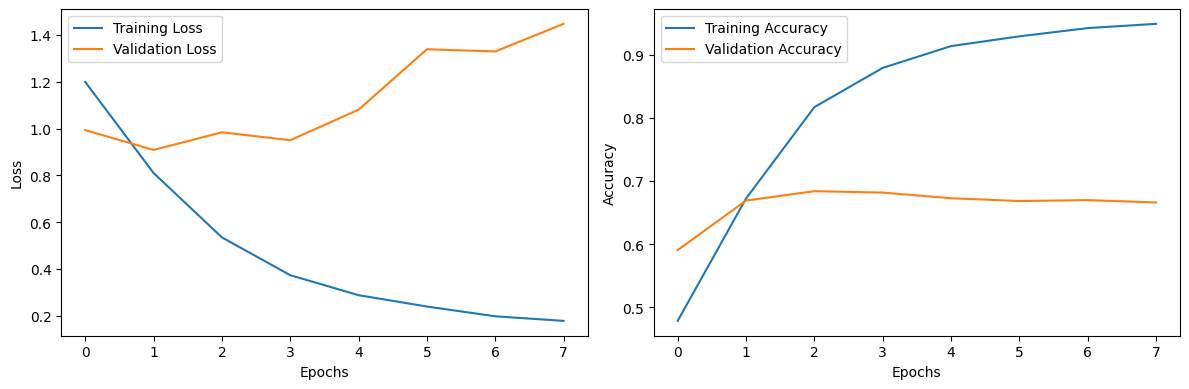

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Having tried these tunings, my best model is as above. Although the model is not the best and there is clear overfitting, it still performs slightly better than random guessing at above 60% accuracy.

Prior to obtaining this result, I had tried several hyperparameter tunings:

1. Adding More Units in Bidirectional and Dense Layers:
   -  Reason: Increasing the number of units in these layers can potentially help the model capture more complex patterns in the data.

2. Adding More Bidirectional and Dense Layers:
   -  Reason: Stacking more layers can increase the model's capacity to learn hierarchical features from the data. Deeper networks are often better at capturing intricate patterns.

3. Adding L2 Regularization to Dense Layers:
   -  Reason: L2 regularization helps prevent overfitting by adding a penalty term to the loss function that discourages large weights.

4. Using Dropout and SpatialDropout1D:
   -  Reason: Dropout and SpatialDropout1D are regularization techniques that randomly drop a fraction of units during training. This helps prevent co-adaptation of neurons and can reduce overfitting by providing a form of model averaging.

5. Adding Batch Normalization:
   -  Reason: Batch normalization normalizes the activations within a layer during training, which can help stabilize and speed up training. It may improve the model's convergence and generalization.

6. Adjusting the Vocabulary Size:
   -  Reason: The vocabulary size determines the granularity of text representations. Increasing it allows the model to capture more unique words and can help balance representation quality and model complexity.

7. Adjusting learning rate
   -  Reason: Learning rate affects the speed and stability of training. I adjust it to help the model find the right balance between fast convergence and avoiding overshooting the optimal weights.



In [ ]:
test_ds = tf.keras.preprocessing.text_dataset_from_directory(
    '/tweet_processed/test',
    batch_size=128)

Found 1673 files belonging to 3 classes.


# Evaluate the tweet model's performance on unnseen data

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

14/14 [==============================] - 1s 82ms/step - loss: 1.5322 - accuracy: 0.6509
Test Loss: 1.5322387218475342
Test Accuracy: 0.6509264707565308


The model performs quite well at 65% accuracy for predicting the sentiment for the text.

In [ ]:
import numpy as np

y_preds = np.array([])
y_labels = np.array([])

for texts, labels in test_ds:
    preds = model.predict(texts)
    preds = np.argmax(preds, axis=1)
    y_preds = np.concatenate((y_preds, preds), axis=0)
    y_labels = np.concatenate((y_labels, labels), axis=0)

1/1 [==============================] - 7s 7s/step


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_labels, y_preds))

              precision    recall  f1-score   support

         0.0       0.69      0.67      0.68       600
         1.0       0.60      0.65      0.63       613
         2.0       0.66      0.62      0.64       460

    accuracy                           0.65      1673
   macro avg       0.65      0.65      0.65      1673
weighted avg       0.65      0.65      0.65      1673



Overall, the f1-score for all classes are around 65%, indicating the model's ability to work well in classifying all 3 types of sentiments.

# Training the Amazon Model

Amazon product reviews dataset. Since it is related to products and not services, let's see how the model will fare when tested on the tweets after being trained.

In [ ]:
import tensorflow as tf

batch_size = 128
seed = 123
train_ds = tf.keras.preprocessing.text_dataset_from_directory(
    '/amazon_processed/train', batch_size=batch_size, validation_split=0.2, # specify batch_size. split the data file into multiple batches, each containing 128 records.
    subset='training', seed=seed)
val_ds = tf.keras.preprocessing.text_dataset_from_directory(
    '/amazon_processed/train', batch_size=batch_size, validation_split=0.2,
    subset='validation', seed=seed)

Found 7200 files belonging to 3 classes.
Using 5760 files for training.
Found 7200 files belonging to 3 classes.
Using 1440 files for validation.


In [ ]:
for text_batch, label_batch in train_ds.take(1):
    for i in range(3):
        print(label_batch[i].numpy(), text_batch[i].numpy())

# Number at the start represents sentiment. Pos sentiment.

1 b'The okay strong favor expected'
2 b'say glad read review Sandy hit nose remembered Callard Bowser English company sold best licorice ever time grandmother introduced The licorice toffee candy came silver box piece separately covered striped silver black wrapping came certificate quality fell instantly bought ever could heartbroken found Callard Bowser went business This confection similar original fell first piece smiling almost giddy found best licorice This original fell softer freshener candy signed subscription delivery happier Gustaf Licorice Caramels made Holland disappointed WOW heaven'
0 b'aware shipping charge per box per shipment purchased three box standard shipping sold Target paid shipping standard shipping The star rating transaction'


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Vocabulary size and number of words in a sequence.
VOCAB_SIZE = 22375
MAX_SEQUENCE_LENGTH = 250 # Average length of text is ~250 so set it as max sequence length.

# Use the text vectorization layer to normalize, split, and map strings to
# integers.
# Set maximum_sequence length as all samples are not of the same length.
vectorize_layer = tf.keras.layers.TextVectorization(  # Convert text into a sequence of integers
    max_tokens=VOCAB_SIZE,
    output_sequence_length=MAX_SEQUENCE_LENGTH
)

# Make a text-only dataset (no labels) and call adapt to build the vocabulary.
text_ds = train_ds.map(lambda x, y: x)
vectorize_layer.adapt(text_ds)

In [ ]:
import tensorflow.keras as keras

EMBEDDING_DIM=128
# Applying the same architecture/layers
model = tf.keras.Sequential([
    vectorize_layer,

    # Embedding Layer
    tf.keras.layers.Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, mask_zero=True),

    # More LSTM units for more representational power
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)),

    # Stacking multiple LSTM layers for increased complexity and learn more pattern
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),

    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),

    # Dense Layers with ReLU Activation and l2 regularization to reduce overfitting
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),

    tf.keras.layers.Dropout(0.2),

    # Increased the number of units in the dense layers
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),

    # Output Layer with Softmax Activation (Multi-class classification)
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

optimizer = tf.keras.optimizers.Adam()

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer=optimizer,
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 250)              0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 250, 128)          2864000   
                                                                 
 bidirectional_6 (Bidirectio  (None, 250, 256)         263168    
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 250, 128)         164352    
 nal)                                                            
                                                                 
 bidirectional_8 (Bidirectio  (None, 64)               41216     
 nal)                                                 

In [ ]:
history = model.fit(train_ds,
          epochs=8,
          validation_data=val_ds)

Epoch 1/8
45/45 [==============================] - 180s 3s/step - loss: 1.2012 - accuracy: 0.4719 - val_loss: 0.9819 - val_accuracy: 0.5528
Epoch 2/8
45/45 [==============================] - 135s 3s/step - loss: 0.7815 - accuracy: 0.6679 - val_loss: 0.8375 - val_accuracy: 0.6653
Epoch 3/8
45/45 [==============================] - 137s 3s/step - loss: 0.4546 - accuracy: 0.8507 - val_loss: 1.0287 - val_accuracy: 0.6736
Epoch 4/8
45/45 [==============================] - 136s 3s/step - loss: 0.2963 - accuracy: 0.9156 - val_loss: 1.1904 - val_accuracy: 0.6472
Epoch 5/8
45/45 [==============================] - 132s 3s/step - loss: 0.2357 - accuracy: 0.9373 - val_loss: 1.2878 - val_accuracy: 0.6347
Epoch 6/8
45/45 [==============================] - 137s 3s/step - loss: 0.1823 - accuracy: 0.9497 - val_loss: 1.4960 - val_accuracy: 0.6417
Epoch 7/8
45/45 [==============================] - 135s 3s/step - loss: 0.1491 - accuracy: 0.9646 - val_loss: 1.5768 - val_accuracy: 0.6389
Epoch 8/8
45/45 [===

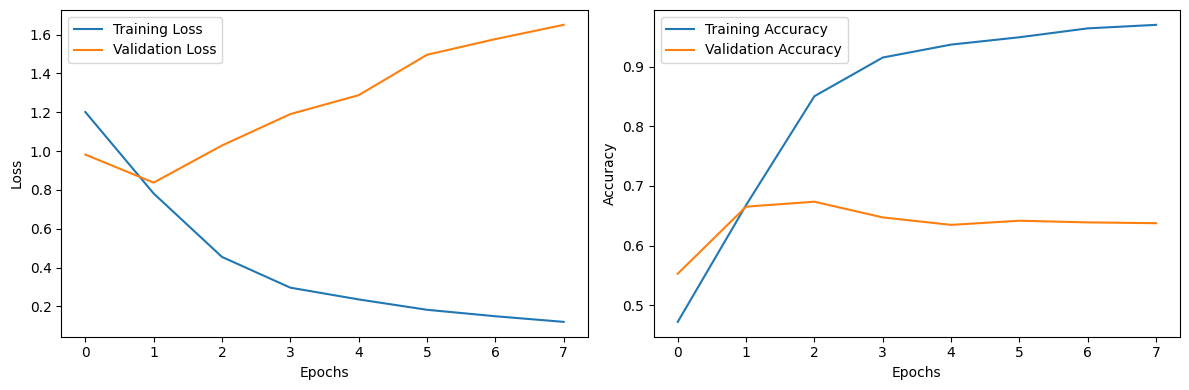

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Just like the tweet data, the model is overfitted as the training and validation loss are very different.

# Evaluate the Amazon model's performance on tweet data

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

14/14 [==============================] - 6s 413ms/step - loss: 1.9997 - accuracy: 0.4423
Test Loss: 1.9997491836547852
Test Accuracy: 0.44231918454170227


The model performs terribly at 44% accuracy for predicting the sentiment for the text, which is worse than random guessing.

In [ ]:
import numpy as np

y_preds = np.array([])
y_labels = np.array([])

for texts, labels in test_ds:
    preds = model.predict(texts)
    preds = np.argmax(preds, axis=1)
    y_preds = np.concatenate((y_preds, preds), axis=0)
    y_labels = np.concatenate((y_labels, labels), axis=0)

1/1 [==============================] - 7s 7s/step


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_labels, y_preds))

              precision    recall  f1-score   support

         0.0       0.54      0.28      0.37       600
         1.0       0.41      0.52      0.46       613
         2.0       0.43      0.56      0.49       460

    accuracy                           0.44      1673
   macro avg       0.46      0.45      0.44      1673
weighted avg       0.46      0.44      0.43      1673



The model works terribly after being trained on the new dataset. This could be due to the difference in topics and words used.

Seen in the classification matrix, the f1 score for all classes are around 40%, showing the model's inability to work well with the 3 sentiment classes.

This shows that building task specific models may be better than reusing models trained for other tasks.